In [2]:
import pandas as pd 
import numpy as np 




raw_df = pd.read_csv('../data/raw/online_retail.csv', encoding='ISO-8859-1')


print(f'행 수 {len(raw_df)}')
display(raw_df.info())


행 수 541909
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

In [3]:
print("\n비어 있는 값 확인")
print(raw_df.isnull().sum())


비어 있는 값 확인
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
display(raw_df.describe())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df = raw_df.dropna(subset=['CustomerID'])


df = df[(df['Quantity']>0) & (df['UnitPrice']> 0)]


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst= True)


df['TotalSum'] = df['Quantity'] * df["UnitPrice"]

print(len(df))

397884


In [8]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})


rfm.columns = ['Recency', 'Frequency', 'Monetary']

display(rfm.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


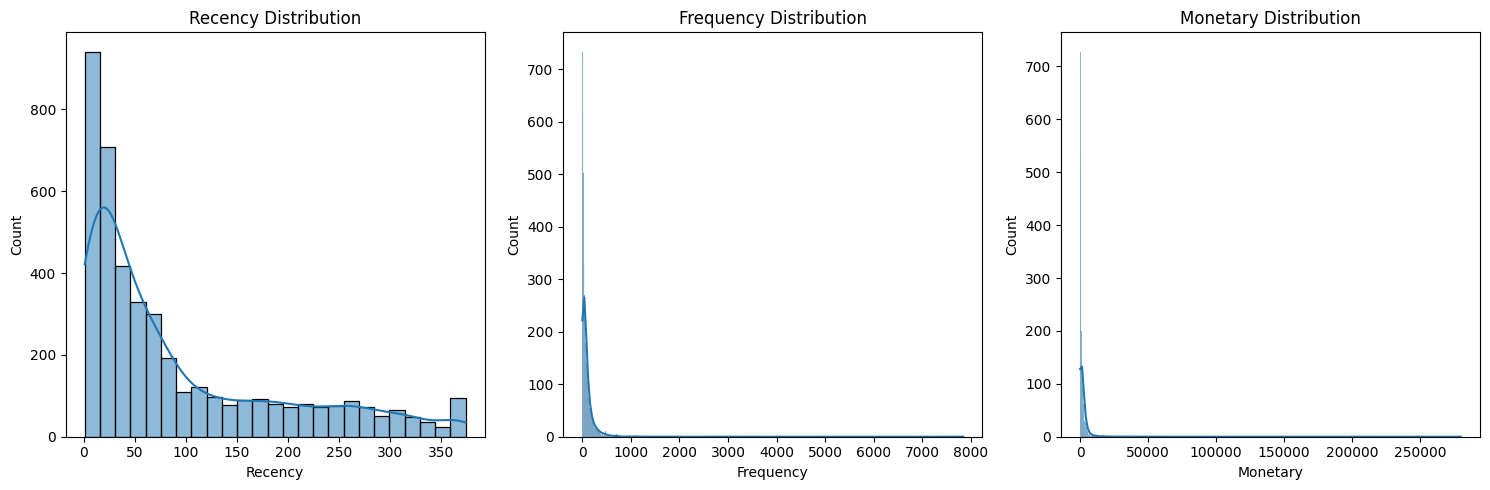

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm['Recency'], ax=axes[0], kde=True).set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], ax=axes[1], kde=True).set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], ax=axes[2], kde=True).set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [ ]:

import os
os.makedirs('../data/processed', exist_ok=True)

rfm.to_csv('../data/processed/rfm_data.csv')
print("RFM 지표 저장이 완료되었습니다.")

In [11]:
r_labels = range(5,0,-1)
f_labels = range(1,6)
m_labels = range(1,6)


rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5 , labels = r_labels)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5 , labels = f_labels)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5 , labels=  m_labels)

rfm['RPM_Sum']  = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

display(rfm.head())

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RPM_Sum
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,7
12347.0,2,182,4310.00,5,5,5,15
12348.0,75,31,1797.24,2,3,4,9
12349.0,19,73,1757.55,4,4,4,12
12350.0,310,17,334.40,1,2,2,5
